# 1. Libaries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, plot_confusion_matrix, precision_recall_curve, f1_score
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score

from models.EFM import Ethereum_Fraud_Model
from models.RF import Random_Forest_Model
from models.DBSCAN import DBSCAN_Model
from models.SVM import SVM_Model
from models.LR import Logistic_Regression_Model
# from models.GMM import GMM_Model
from models.PCA import PCA_Transformer

from config import *
from utils.cleaner import *

# 2. Data Reading

In [2]:
efm = Ethereum_Fraud_Model()
print(efm.df.shape)
display(efm.df.head())

(9841, 50)


,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
9583,1922,0xe2621777f2d10d2fc5cf2f7f48d680044f2e49a8,1,0.00,50.48,169929.55,1,2,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
7315,4383,0xc4af869131d6d47b1b4bdbc83ff0fdb423f03cb0,0,0.00,0.00,653.53,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2613,2614,0x44452f76dd10cff0769489773682814fdb6b7d0b,0,1594.06,34225.08,288147.18,9,8,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4783,1851,0x7f22dd83cb95a28188c7060508f29da495ed806f,0,0.00,8030.70,88337.70,0,11,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4738,1806,0x7e12f5dc3077e0c028ccac9279c49928489beb2d,0,21.46,0.00,64.38,3,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


# 3. Data Exploration

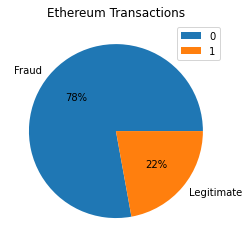

In [3]:
df = efm.df.copy()
flag_counts = df['FLAG'].value_counts()

plt.pie(flag_counts, labels={'Fraud', 'Legitimate'}, autopct='%.0f%%')
plt.title('Ethereum Transactions')
plt.legend(flag_counts.keys().tolist())
plt.show()

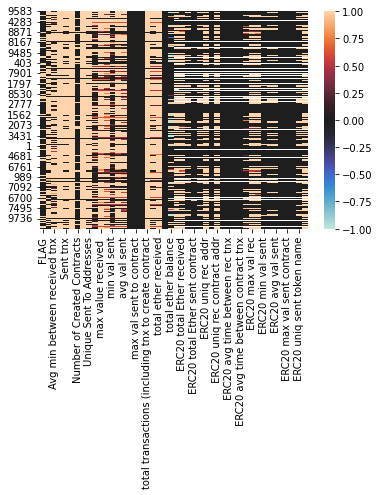

In [4]:
df.drop(efm.filtered_colns, axis=1, inplace=True)
ax = sns.heatmap(df, center=0, vmin=-1, vmax=1)

['total ether sent contracts', ' ERC20 max val rec', ' ERC20 min val sent', ' ERC20 max val sent', ' ERC20 avg val sent', ' ERC20 uniq rec token name']


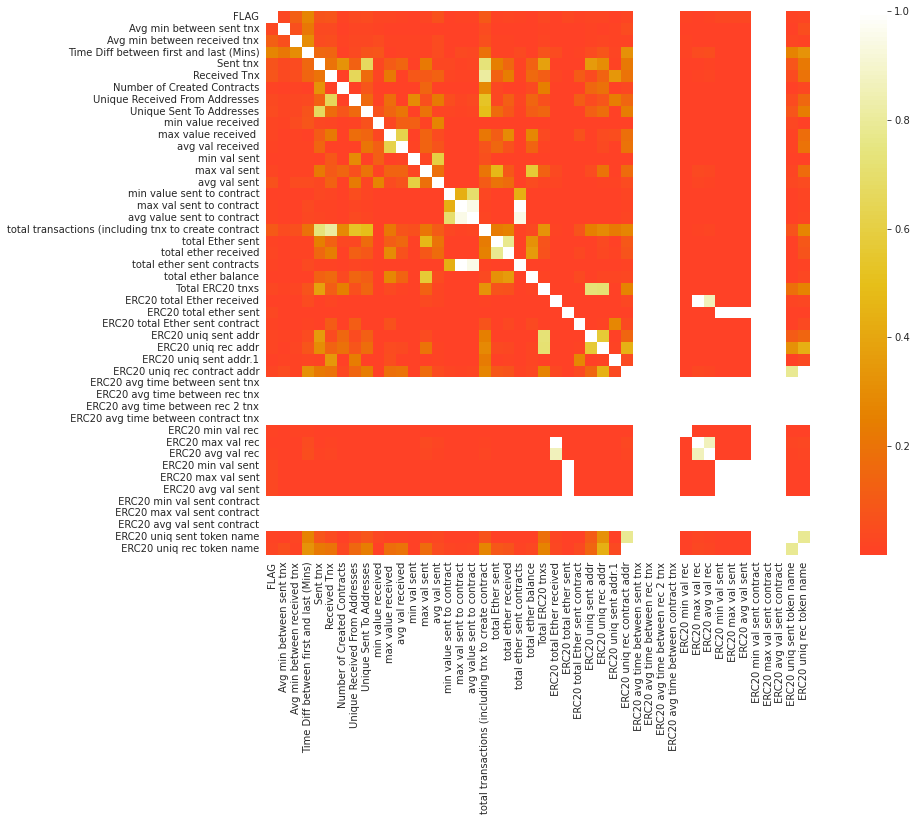

In [5]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr_matrix, annot=False, cmap='CMRmap', center=0, square=True)

# Find features with correlation greater than 0.95
corr_colns = [column for column in upper.columns if any(upper[column] > 0.95)]

print(corr_colns)
df.drop(corr_colns, axis=1, inplace=True)

# Add Box Plot Analysis

# 4. Data Cleaning

In [6]:
print_nan_data(df)

FLAG                                                    0.000000
Avg min between sent tnx                                0.000000
Avg min between received tnx                            0.000000
Time Diff between first and last (Mins)                 0.000000
Sent tnx                                                0.000000
Received Tnx                                            0.000000
Number of Created Contracts                             0.000000
Unique Received From Addresses                          0.000000
Unique Sent To Addresses                                0.000000
min value received                                      0.000000
max value received                                      0.000000
avg val received                                        0.000000
min val sent                                            0.000000
max val sent                                            0.000000
avg val sent                                            0.000000
min value sent to contrac

In [5]:
# Drop missing data observations/rows
df_clean = remove_nan_rows(df)
print_nan_data(df_clean)

FLAG                                                    0.0
Avg min between sent tnx                                0.0
Avg min between received tnx                            0.0
Time Diff between first and last (Mins)                 0.0
Sent tnx                                                0.0
Received Tnx                                            0.0
Number of Created Contracts                             0.0
Unique Received From Addresses                          0.0
Unique Sent To Addresses                                0.0
min value received                                      0.0
max value received                                      0.0
avg val received                                        0.0
min val sent                                            0.0
max val sent                                            0.0
avg val sent                                            0.0
min value sent to contract                              0.0
max val sent to contract                

In [7]:
# Drop missing data features/columns
# df_clean = remove_nan_columns(df)

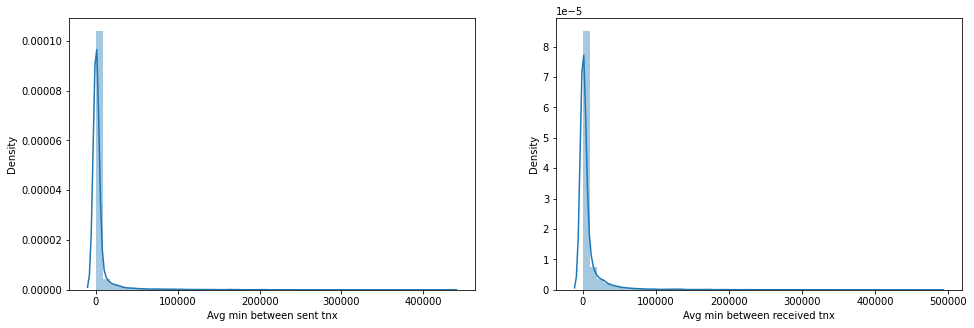

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Avg min between sent tnx'])
plt.subplot(1,2,2)
sns.distplot(df['Avg min between received tnx'])
plt.show()

<AxesSubplot:xlabel='Avg min between received tnx'>

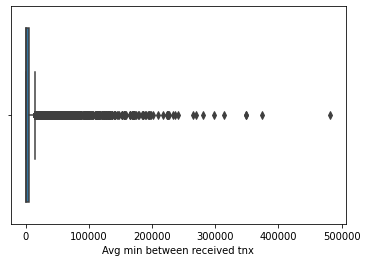

In [9]:
sns.boxplot(df['Avg min between received tnx'])

In [10]:
percentile25 = df['Avg min between received tnx'].quantile(0.25)
percentile75 = df['Avg min between received tnx'].quantile(0.75)

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

df[df['Avg min between received tnx'] > upper_limit]
df[df['Avg min between received tnx'] < lower_limit]

NameError: name 'iqr' is not defined

# 5. Data Preparation

In [6]:
# Normalizae Data
df_norm = df_clean.copy()

# apply normalization techniques
for column in df_norm.columns:
    if column == TARGET:
        continue
    print(column, df_norm[column].max(), df_norm[column].min(), (df_norm[column].max() - df_norm[column].min()))
    df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())

df_norm.dropna(inplace=True, axis=1)
print(df_norm)

Avg min between sent tnx 430287.67 0.0 430287.67
Avg min between received tnx 482175.49 0.0 482175.49
Time Diff between first and last (Mins) 1954860.95 0.0 1954860.95
Sent tnx 10000 0 10000
Received Tnx 10000 0 10000
Number of Created Contracts 9995 0 9995
Unique Received From Addresses 9999 0 9999
Unique Sent To Addresses 9287 0 9287
min value received 10000.0 0.0 10000.0
max value received  800000.0 0.0 800000.0
avg val received 283618.8316 0.0 283618.8316
min val sent 12000.0 0.0 12000.0
max val sent 520000.0 0.0 520000.0
avg val sent 12000.0 0.0 12000.0
min value sent to contract 0.02 0.0 0.02
max val sent to contract 0.046029 0.0 0.046029
avg value sent to contract 0.023014 0.0 0.023014
total transactions (including tnx to create contract 19995 0 19995
total Ether sent 28580960.89 0.0 28580960.89
total ether received 28581590.07 0.0 28581590.07
total ether sent contracts 0.046028713 0.0 0.046028713
total ether balance 14288636.26 -15605352.04 29893988.299999997
 Total ERC20 tnxs 

In [9]:
display(df_norm)

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 avg val rec,ERC20 uniq sent token name
7908,1,0.000000,0.000000e+00,0.000000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000e+00,...,1.336973e-11,0.000000e+00,0.0,0.000000,0.000233,0.0,0.001279,1.350505e-05,7.754406e-10,0.000000
6571,0,0.000000,3.441361e-03,0.117138,0.0000,0.0138,0.0001,0.000300,0.000000,0.000000e+00,...,5.219658e-13,0.000000e+00,0.0,0.000000,0.000466,0.0,0.002558,2.216616e-07,1.513693e-11,0.000000
399,0,0.000004,2.073934e-08,0.000003,0.0003,0.0045,0.0000,0.004500,0.000323,5.280000e-08,...,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000
3750,0,0.000000,6.569289e-03,0.149072,0.0000,0.0092,0.0001,0.000500,0.000000,0.000000e+00,...,1.351101e-12,0.000000e+00,0.0,0.000000,0.000466,0.0,0.002558,4.306566e-07,3.918173e-11,0.000000
7253,0,0.000000,1.804509e-03,0.102370,0.0000,0.0230,0.0001,0.000400,0.000000,0.000000e+00,...,2.197226e-12,0.000000e+00,0.0,0.000000,0.000466,0.0,0.002558,6.224404e-07,6.371924e-11,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,0,0.045335,1.413519e-01,0.289021,0.0008,0.0006,0.0000,0.000200,0.000323,5.000000e-07,...,6.636302e-11,5.441976e-10,0.0,0.000152,0.000699,0.0,0.003836,1.428495e-06,1.283012e-09,0.004695
7860,1,0.000000,2.199946e-03,0.004060,0.0001,0.0007,0.0000,0.000600,0.000108,5.000000e-05,...,1.336973e-11,0.000000e+00,0.0,0.000000,0.000233,0.0,0.001279,1.350505e-05,7.754406e-10,0.000000
4939,0,0.000000,1.399760e-02,0.072504,0.0000,0.0021,0.0001,0.000600,0.000000,0.000000e+00,...,6.795494e-12,0.000000e+00,0.0,0.000000,0.000466,0.0,0.002558,1.813768e-06,1.970683e-10,0.000000
3226,0,0.083074,3.055535e-01,0.468259,0.0005,0.0005,0.0000,0.000500,0.000215,6.620000e-08,...,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000


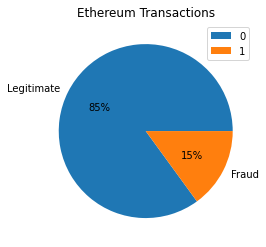

In [7]:
flag_counts = df_norm['FLAG'].value_counts()

plt.pie(flag_counts, labels={'Fraud', 'Legitimate'}, autopct='%.0f%%')
plt.title('Ethereum Transactions')
plt.legend(flag_counts.keys().tolist())
plt.show()

# 6. Sampling

## Method 1. SMOTE Sampling

In [34]:
from utils.sampling import smote

df_smote = df_norm.copy()

X = df_smote.drop(TARGET, axis=1)
y = df_smote[TARGET]
X_res, y_res = smote(X, y, verbose=True)
df_smote = pd.concat([X_res, y_res], axis=1)
display(df_smote.head())

Original Data Distribution:  Counter({0: 7662, 1: 1350})
Data Distribution After SMOTE:  Counter({1: 7662, 0: 7662})


,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name,FLAG
0,0.000000,0.000105,0.086927,0.0001,0.0002,0.0000,0.0002,0.000108,0.000055,6.986463e-07,...,0.001279,0.000014,1.337000e-11,7.754406e-10,0.0,0.0,0.0,0.0,0.001357,1
1,0.000000,0.000000,0.000334,0.0001,0.0001,0.0000,0.0001,0.000108,0.001000,1.250000e-05,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0
2,0.003705,0.070981,0.147400,0.0009,0.0008,0.0000,0.0002,0.000861,0.000063,2.602755e-05,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0
3,0.000000,0.016655,0.045189,0.0000,0.0011,0.0001,0.0004,0.000000,0.000000,1.108400e-04,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0
4,0.000050,0.000000,0.000033,0.0003,0.0001,0.0000,0.0001,0.000323,0.010100,1.262500e-04,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0


## Method 2. 3-Way cross validation

# 7. Modeling

## Model 1. Supervised: Random Forest

In [21]:
df_rfm = df_smote.copy()
rfm = Random_Forest_Model(df_rfm)
rfm.set_max_depth(100)
efm.add_model(rfm)
efm.run_model(model_name='RandomForest')

KeyboardInterrupt: 

## Model 2. Supervised: Logistic Regression

Model Name:  Logistic Regression
Accuracy Score:  0.6825448613376836
AUPRC: 0.7512664472346549
F1 score:  0.7245966600622701 

Accuracy Score:  0.6861337683523654
AUPRC: 0.7488922670209315
F1 score:  0.7365826944140198 

Accuracy Score:  0.6893964110929853
AUPRC: 0.7352823085604334
F1 score:  0.7346711259754738 

Accuracy Score:  0.6734094616639478
AUPRC: 0.7335793937908783
F1 score:  0.7238620689655172 

Accuracy Score:  0.6866840731070496
AUPRC: 0.754732611624159
F1 score:  0.7371303395399781 



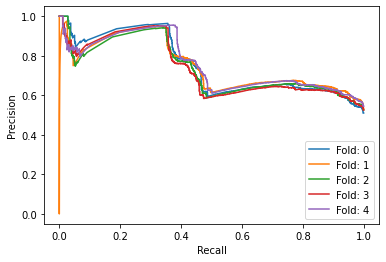

Token Counts f1 score lbfgs:  0.7313685777914518


In [21]:
df_lr = df_smote.copy()
df_lr = shuffle(df_lr)
lr = Logistic_Regression_Model(df_lr)
lr.run()

## Model 3. Supervised: Support Vector Machine (SVM)

Model Name:  SVM
Accuracy: 0.7057096247960848
F1 score: 0.7437499999999999
AUPRC: 0.8179327102715159
Accuracy: 0.7265905383360522
F1 score: 0.7659217877094973
AUPRC: 0.8366505007510886
Accuracy: 0.7187601957585644
F1 score: 0.7556689342403629
AUPRC: 0.8241805572610958
Accuracy: 0.7239804241435562
F1 score: 0.7678375411635564
AUPRC: 0.8603511381544683
Accuracy: 0.7287859007832899
F1 score: 0.7730128380223983
AUPRC: 0.8359340866968384


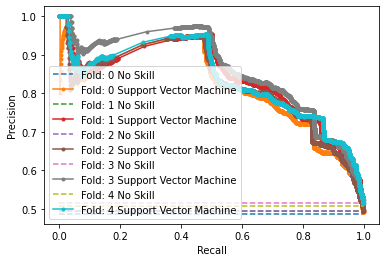

Token Counts f1 score lbfgs:  0.7612382202271629


'\'df_svm = shuffle(df_svm)\nX = df_svm.drop(columns=[TARGET_FEATURE], axis=1)\ny = df_svm[TARGET_FEATURE]\n\nfor count, (train, test) in enumerate(kfold(X, y, 5)):\n    X_train, X_test = X.iloc[train], X.iloc[test]\n    y_train, y_test = y.iloc[train], y.iloc[test]\n    clf = svm.SVC(probability = True)\n    clf.fit(X_train,y_train)\n    y_pred = clf.predict_proba(X_test)\n    y_hat = clf.predict(X_test)\n    # Model Accuracy, how often is the classifier correct?\n    print("Accuracy:", accuracy_score(y_test, y_hat))\n    print("F1 score:", f1_score(y_test, y_hat))\n    fraud_precision, fraud_recall, thresholds = precision_recall_curve(y_test, y_pred[:, 1])\n    print("AUPRC:", auc(fraud_recall, fraud_precision))\n    # plot the precision-recall curves\n    no_skill = len(y_test[y_test==1]) / len(y_test)\n    label = \'Fold: \'+ str(count)\n    plt.plot([0, 1], [no_skill, no_skill], linestyle=\'--\', label=label+\' No Skill\')\n    plt.plot(fraud_recall, fraud_precision, marker=\'.\',

In [31]:
from sklearn import svm

df_svm = df_smote.copy()
svm_model = SVM_Model(df_svm)
svm_model.run()

## Model 3. Unsupervised: GMM

In [35]:
pca_transformer = PCA_Transformer(df_smote)
pca_transformer.set_n_components(10)
df_pca = pca_transformer.run()

display(df_pca)

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,FLAG
0,-0.536690,-0.041453,-0.005513,-0.020688,0.038098,0.202577,0.065690,0.154934,0.489656,0.382891,1
1,-0.515515,-0.066091,0.005638,-0.037085,0.225144,0.270659,-0.021606,0.023384,0.036540,-0.094687,0
2,-0.348938,-0.080291,0.023964,0.025027,0.038410,0.108094,-0.194467,-0.683151,-0.928923,-1.022285,0
3,-0.466626,-0.069579,0.011462,-0.019653,0.166866,0.233808,-0.091687,-0.207170,-0.191632,-0.316873,0
4,-0.494487,-0.065759,0.003065,-0.038268,0.249006,0.244715,0.036858,0.086792,0.038179,-0.130187,0
...,...,...,...,...,...,...,...,...,...,...,...
15319,-0.371910,-0.041960,-0.017032,-0.002968,-0.205719,0.050149,0.064945,-0.069751,0.070396,-0.079905,1
15320,-0.204951,-0.054068,-0.003984,0.055448,-0.435283,-0.334945,0.106078,-0.385891,-0.692826,-0.726447,1
15321,-0.592565,-0.038313,-0.013088,-0.049634,0.136175,0.252723,0.098773,0.332931,0.699455,0.564953,1
15322,-0.603984,-0.040219,-0.012352,-0.043172,0.091207,0.262673,0.099932,0.247754,0.630587,0.469369,1


In [36]:
# Trying Standardizing data to get better result with 

from sklearn.preprocessing import StandardScaler
import matplotlib.gridspec as gridspec

from sklearn.preprocessing import PowerTransformer

gmm_df = df_norm.copy().drop(TARGET, axis=1)
gmm_features = gmm_df.columns

# Standardization
# scale= StandardScaler()
# gmm_df = pd.DataFrame(scale.fit_transform(gmm_df), columns=gmm_df.columns)
# gmm_df[TARGET] = df_norm[TARGET]

# print(df_norm.shape)
# print(gmm_df.shape)

from sklearn.preprocessing import PowerTransformer

# Transform
powerTran = PowerTransformer(method="yeo-johnson")
gmm_df = powerTran.fit_transform(gmm_df)
gmm_df = pd.DataFrame(gmm_df, columns=gmm_features)
gmm_df[TARGET] = df_norm[TARGET] 

print(df_norm.shape)
print(gmm_df.shape)

# Draw
# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# features = ['Avg min between sent tnx', 'Avg min between received tnx', 'Sent tnx', 'Received Tnx']
# features = gmm_df.columns

# nplots=np.size(features)
# plt.figure(figsize=(15,4*nplots))
# gs = gridspec.GridSpec(nplots,1)
# for i, feat in enumerate(features):
#     ax = plt.subplot(gs[i])
#     sns.distplot(gmm_df[feat][df.FLAG==1], bins=30)
#     sns.distplot(gmm_df[feat][df.FLAG==0],bins=30)
#     ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
#     ax.set_xlabel('')
#     ax.set_title('Distribution of feature: ' + feat)

# print(gmm_df['Avg min between sent tnx'].min())
# print(gmm_df['Avg min between sent tnx'].max())

'''
print(gmm_df[feature1].mean())
print(gmm_df[feature1].std())

ax[0,0].hist(gmm_df[feature1], bins=100)
ax[0,0].set_title(feature1, fontsize=14)
ax[0,0].set_ylabel('Transactions')

ax[0,1].hist(gmm_df[feature2], bins=100)
ax[0,1].set_title(feature2, fontsize=14)
ax[0,1].set_ylabel('Transactions')

ax[1,0].hist(gmm_df[feature3], bins=100)
ax[1,0].set_title(feature3, fontsize=14)
ax[1,0].set_ylabel('Transactions')

ax[1,1].hist(gmm_df[feature4], bins=100)
ax[1,1].set_title(feature4, fontsize=14)
ax[1,1].set_ylabel('Transactions')
'''

(9012, 39)
(9012, 39)


"\nprint(gmm_df[feature1].mean())\nprint(gmm_df[feature1].std())\n\nax[0,0].hist(gmm_df[feature1], bins=100)\nax[0,0].set_title(feature1, fontsize=14)\nax[0,0].set_ylabel('Transactions')\n\nax[0,1].hist(gmm_df[feature2], bins=100)\nax[0,1].set_title(feature2, fontsize=14)\nax[0,1].set_ylabel('Transactions')\n\nax[1,0].hist(gmm_df[feature3], bins=100)\nax[1,0].set_title(feature3, fontsize=14)\nax[1,0].set_ylabel('Transactions')\n\nax[1,1].hist(gmm_df[feature4], bins=100)\nax[1,1].set_title(feature4, fontsize=14)\nax[1,1].set_ylabel('Transactions')\n"

In [49]:
TARGET_FEATURE = 'FLAG'
from sklearn.mixture import GaussianMixture

class GMM_Model():
    """
        Class for GMM Model
    """
    def __init__(self, df):
        self.df = df
        self.preprocess_data()
        self.train, self.valid, self.test = self.spilt_data_3way()
        self.model_name = 'GMM'

    def get_model_name(self):
        return self.model_name
    
    def update_dataframe(self, df):
        self.df = df
        self.preprocess_data()
        self.train, self.valid, self.test = self.spilt_data_3way()

    def preprocess_data(self):
        # QuickFix, Need to update it once data cleaning and preparation step completes
        self.df.fillna(self.df.median(), inplace=True)
        self.normal_data = self.df[self.df[TARGET_FEATURE] == 0]
        self.anomaly_data = self.df[self.df[TARGET_FEATURE] == 1]
    
    # TO-DO: Allow consumer function to split percentages
    def spilt_data_3way(self, normal_data=None, anomaly_data=None):
        if not normal_data:
            normal_data = self.normal_data
        if not anomaly_data:
            anomaly_data = self.anomaly_data
            
        # Spliting Normal data into 80% + 10% + 10%
        train, valid, test = np.split(normal_data.sample(frac=1, random_state=42), [int(.8*len(normal_data)), int(.9*len(normal_data))])
        
        # Splitting Anomaly data into 50% + 50%
        valid_anomaly, test_anomaly = np.split(anomaly_data.sample(frac=1, random_state=42), [int(.5*len(anomaly_data))])
        
        # Combining Validation data and shuffling it
        valid = pd.concat([valid, valid_anomaly]).sample(frac=1)
        
        # Combining Test Data and shuffling it
        test = pd.concat([test, test_anomaly]).sample(frac=1)
        # print('Train shape: ', train.shape)
        # print('Proportion os anomaly in training set: %.3f\n' % train[TARGET_FEATURE].mean())
        # print('Valid shape: ', valid.shape)
        # print('Proportion os anomaly in validation set: %.3f\n' % valid[TARGET_FEATURE].mean())
        # print('Test shape:, ', test.shape)
        # print('Proportion os anomaly in test set: %.3f\n' % test[TARGET_FEATURE].mean())
        return (train, valid, test)
    
    def compute_threshold_range(self, model, train, valid):
        x1 = model.score(train.drop(TARGET, axis=1).values)
        x2 = model.score(valid[valid[TARGET] == 0].drop(TARGET, axis=1).values)
        x3 = model.score(valid[valid[TARGET] == 1].drop(TARGET, axis=1).values)
        l = sorted([x1, x2, x3])
        return (min(l), max(l))
        
    # TO-DO: Break this big function into train, test and evaluate functions
    def run(self, train=None, valid=None, test=None, verbose=False):
        print("Model Name: " + self.get_model_name())
        display(self.df.head())
        if not train:
            train = self.train
        if not valid:
            valid = self.valid
        if not test:
            test = self.test
        for components in range(1, 5):
            print('Components: ' + str(components))
            # gmm = GaussianMixture(n_components=components, n_init=4, random_state=42, covariance_type='tied')
            gmm = GaussianMixture(n_components=components, n_init=4, random_state=42)
            # Train GMM on train data
            gmm.fit(train.drop(TARGET_FEATURE, axis=1).values)
            if verbose:
                print('GMM Score for train set')
                print(gmm.score(train.drop(TARGET_FEATURE, axis=1).values))
                print('GMM Score for normal transcation subset in validation set')
                print(gmm.score(valid[valid[TARGET_FEATURE] == 0].drop(TARGET_FEATURE, axis=1).values))
                print('GMM Score for fraud transcation subset in validation set')
                print(gmm.score(valid[valid[TARGET_FEATURE] == 1].drop(TARGET_FEATURE, axis=1).values))
        
            # Figuring out a threshold range based on GMM score obtained from previous step
            threshold_range = self.compute_threshold_range(gmm, train, valid)
            tresholds = np.linspace(-200, 400, 100)
            # gmm.score_samples to calculate a GMM score for each data sample
            y_scores = gmm.score_samples(valid.drop(TARGET_FEATURE, axis=1).values)
            scores = []
            for treshold in tresholds:
                y_hat = (y_scores < treshold).astype(int)
                scores.append([recall_score(y_pred=y_hat, y_true=valid[TARGET_FEATURE].values),
                             precision_score(y_pred=y_hat, y_true=valid[TARGET_FEATURE].values),
                             f1_score(y_pred=y_hat, y_true=valid[TARGET_FEATURE].values)])

            scores = np.array(scores)
            if verbose:
                print(scores[:, 2].max(), scores[:, 2].argmax())
            
            final_tresh = tresholds[scores[:, 2].argmax()]
            if verbose:
                print('The final threshold selected is: ', final_tresh)
            
            fig, ax = plt.subplots()
            plt.plot(tresholds, scores[:, 0], label='$Recall')
            plt.plot(tresholds, scores[:, 1], label='$Precesion')
            plt.plot(tresholds, scores[:, 2], label='$F1')
            ax.legend([i for i in ['Recall', 'Precesion', 'F1']])
            plt.title('n components')
            plt.xlabel('Threshold')
            plt.ylabel('Score')
            plt.show()
            
            y_hat_test = (gmm.score_samples(test.drop(TARGET_FEATURE, axis=1).values) < final_tresh).astype(int)

            # TO-DO: Call defined evaluation functions
            print('Final threshold: %f' % final_tresh)
            print('Test Recall Score: %.3f' % recall_score(y_pred=y_hat_test, y_true=test[TARGET_FEATURE].values))
            print('Test Precision Score: %.3f' % precision_score(y_pred=y_hat_test, y_true=test[TARGET_FEATURE].values))
            print('Test F1 Score: %.3f' % f1_score(y_pred=y_hat_test, y_true=test[TARGET_FEATURE].values))
            print('Accuracy: %.3f' % accuracy_score(y_pred=y_hat_test, y_true=test[TARGET_FEATURE].values))
            
            precesion, recall, _ = precision_recall_curve(y_hat_test, test[TARGET_FEATURE].values)
            print('AUC: %.3f' % auc(precesion, recall))

            cnf_matrix = confusion_matrix(test[TARGET_FEATURE].values, y_hat_test)
            print("tn, fp, fn, tp:", cnf_matrix.ravel())
        

Model Name: GMM


,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
9583,1,0.000000,0.000105,0.086927,0.0001,0.0002,0.0000,0.0002,0.000108,0.000055,...,0.0,0.001279,0.000014,1.337000e-11,7.754406e-10,0.0,0.0,0.0,0.0,0.001357
7315,0,0.000000,0.000000,0.000334,0.0001,0.0001,0.0000,0.0001,0.000108,0.001000,...,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000
2613,0,0.003705,0.070981,0.147400,0.0009,0.0008,0.0000,0.0002,0.000861,0.000063,...,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000
4783,0,0.000000,0.016655,0.045189,0.0000,0.0011,0.0001,0.0004,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000
4738,0,0.000050,0.000000,0.000033,0.0003,0.0001,0.0000,0.0001,0.000323,0.010100,...,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000


Components: 1
GMM Score for train set
131.03837792819905
GMM Score for normal transcation subset in validation set
136.4203995006749
GMM Score for fraud transcation subset in validation set
-2740.763121566996
0.6379962192816635 57
The final threshold selected is:  145.45454545454544


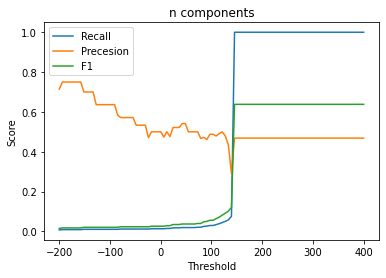

Final threshold: 145.454545
Test Recall Score: 1.000
Test Precision Score: 0.468
Test F1 Score: 0.638
Accuracy: 0.468
AUC: 0.000
tn, fp, fn, tp: [  0 767   0 675]
Components: 2
GMM Score for train set
182.24548389208474
GMM Score for normal transcation subset in validation set
104.37560647447732
GMM Score for fraud transcation subset in validation set
-2147.223453491939
0.6466535433070866 65
The final threshold selected is:  193.93939393939394


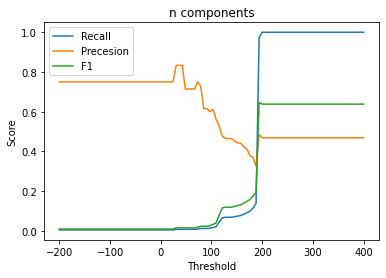

Final threshold: 193.939394
Test Recall Score: 0.981
Test Precision Score: 0.489
Test F1 Score: 0.652
Accuracy: 0.510
AUC: 0.035
tn, fp, fn, tp: [ 74 693  13 662]
Components: 3
GMM Score for train set
189.0332255798807
GMM Score for normal transcation subset in validation set
-38.45679110187574
GMM Score for fraud transcation subset in validation set
-2398.1589038112193
0.6379962192816635 67
The final threshold selected is:  206.06060606060606


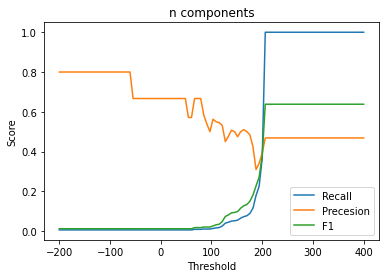

Final threshold: 206.060606
Test Recall Score: 1.000
Test Precision Score: 0.468
Test F1 Score: 0.638
Accuracy: 0.468
AUC: 0.000
tn, fp, fn, tp: [  0 767   0 675]
Components: 4
GMM Score for train set
195.7376207647218
GMM Score for normal transcation subset in validation set
132.9089665679792
GMM Score for fraud transcation subset in validation set
-1881.5559629831264
0.6379962192816635 68
The final threshold selected is:  212.12121212121212


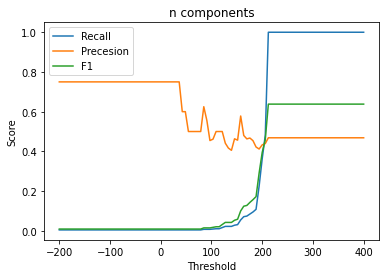

Final threshold: 212.121212
Test Recall Score: 1.000
Test Precision Score: 0.468
Test F1 Score: 0.638
Accuracy: 0.468
AUC: 0.000
tn, fp, fn, tp: [  0 767   0 675]


In [50]:
# GMM
# df_gmm = df_smote.copy()
# gmm_model = GMM_Model(df_pca)
gmm_model = GMM_Model(df_norm)
gmm_model.run(verbose=True)
# efm.add_model(gmm_model)
# efm.run_model(model_name='GMM', verbose=True)

## Model 4. Unsupervised: DBSCAN

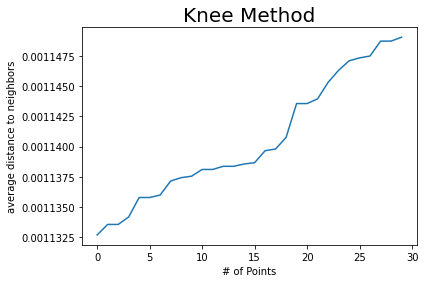

EPS 0.0011381001685537542
Estimated number of clusters: 214
Estimated number of Noise Points: 6662
EPS 0.0011381001685537542
Estimated number of clusters: 214
Estimated number of Noise Points: 6662
EPS 0.001138361974542792
Estimated number of clusters: 214
Estimated number of Noise Points: 6662
EPS 0.001138361974542792
Estimated number of clusters: 214
Estimated number of Noise Points: 6662
EPS 0.001138553570403505
Estimated number of clusters: 214
Estimated number of Noise Points: 6659
EPS 0.0011386614708195563
Estimated number of clusters: 215
Estimated number of Noise Points: 6655
EPS 0.0011396568707737976
Estimated number of clusters: 215
Estimated number of Noise Points: 6653
EPS 0.0011398002116178982
Estimated number of clusters: 215
Estimated number of Noise Points: 6653
EPS 0.0011407605186887926
Estimated number of clusters: 215
Estimated number of Noise Points: 6653
EPS 0.001143575009746082
Estimated number of clusters: 215
Estimated number of Noise Points: 6652
EPS 0.00114357

In [26]:
# DBSCAN Model
df_dbscan = df_smote.copy()
dbscan_model = DBSCAN_Model(df_dbscan)
efm.add_model(dbscan_model)
efm.run_model(model_name='DBSCAN')

# 8. Model Evaluation (by Kenny)

### -------------------- Functions Delarations --------------------

In [ ]:
# Helper: compute corresponding f1-score given thresholds
def compute_f1(y_test, y_pred, thresholds):
    scores = []
    for th in thresholds:
        th_y_pred = y_pred.copy()
        
        th_y_pred[th_y_pred >= th] = 0
        th_y_pred[th_y_pred < th] = 1
        scores.append(f1_score(y_test, th_y_pred))
    return scores


def plot_ROC(y_test, y_pred, plt_config, f1=False):
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    
    scores = []
    if f1:
        scores = compute_f1(y_test, y_pred, thresholds)

    plt.figure(figsize=plt_config['figsize'])
    plt.title('ROC for ' + plt_config['model'])
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.plot([0,1], [0,1], 'y--')
    if f1:
        plt.plot(thresholds, scores, 'r')
    plt.ylabel('True Positive Rate / Score')
    plt.xlabel('False Positive Rate / Threshold')
    plt.legend(['ROC', 'Perfect Classifier', 'F1'])
    plt.show()


def plot_PRC(y_test, y_pred, plt_config, f1=False):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

    scores = []
    if f1:
        scores = compute_f1(y_test, y_pred, thresholds)

    plt.figure(figsize=plt_config['figsize'])
    plt.title('PRC for ' + plt_config['model'])
    plt.plot(recall, precision, 'b')
    if f1:
        plt.plot(thresholds, scores, 'r')
    plt.ylabel('Precision / Score')
    plt.xlabel('Recall / Threshold')
    plt.legend(['PRC', 'F1'])
    plt.show()


## Metric 1. ROC w/ F1

In [ ]:
# Prepare parameters for ROC

# Uncomment the following when you have data ready

"""
# Get probablistic predictions using a trained model
probs = xgb_c.predict_proba(norm_test_f)
pred = probs[:, 1]

# Customize plot
plt_config = {
    'figsize': (12, 8),
    'model': 'XGB Classifier'
}

# Call the function with your choice of f1 plotting (in the same grapgh)
plot_ROC(y_test, pred, plt_config, f1=True)
"""

## Metric 2. PRC w/ F1

In [ ]:
# Prepare parameters for PRC

# Uncomment the following when you have data ready

"""
# Get probablistic predictions using a trained model
probs = xgb_c.predict_proba(norm_test_f)
pred = probs[:, 1]

# Customize plot
plt_config = {
    'figsize': (12, 8),
    'model': 'XGB Classifier'
}

# Call the function with your choice of f1 plotting (in the same grapgh)
plot_PRC(y_test, pred, plt_config, f1=True)
"""